In this notebook, we will be creating a CNN (Convolutional Neural Network) based classifier for the classification of CIFAR-10 dataset.

**About the dataset**

CIFAR-10 dataset is a subset of CIFAR-100 having 80 million images of 100 different objects. CIFAR-10 takes 60,000 images for 10 classes from the original dataset in which 50,000 images are for training and 10,000 images are for testing.

The classes in the dataset are -
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


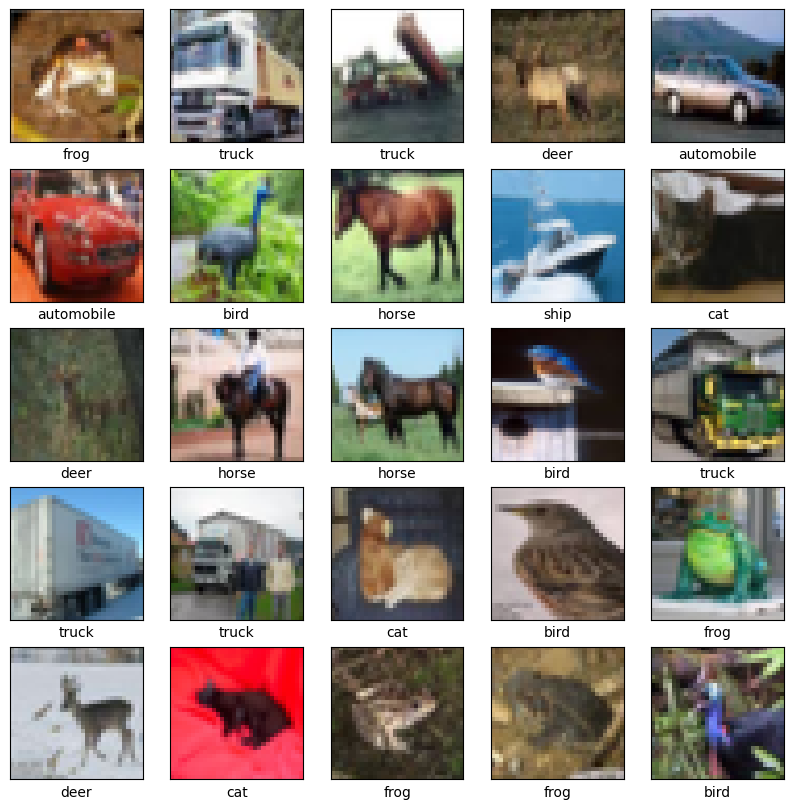

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Creating a CNN model**

We are going to create a CNN based classification model using *keras* module.

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,232 (872.00 KB)

 Trainable params: 223,232 (872.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,794 (1.86 MB)

 Trainable params: 486,794 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

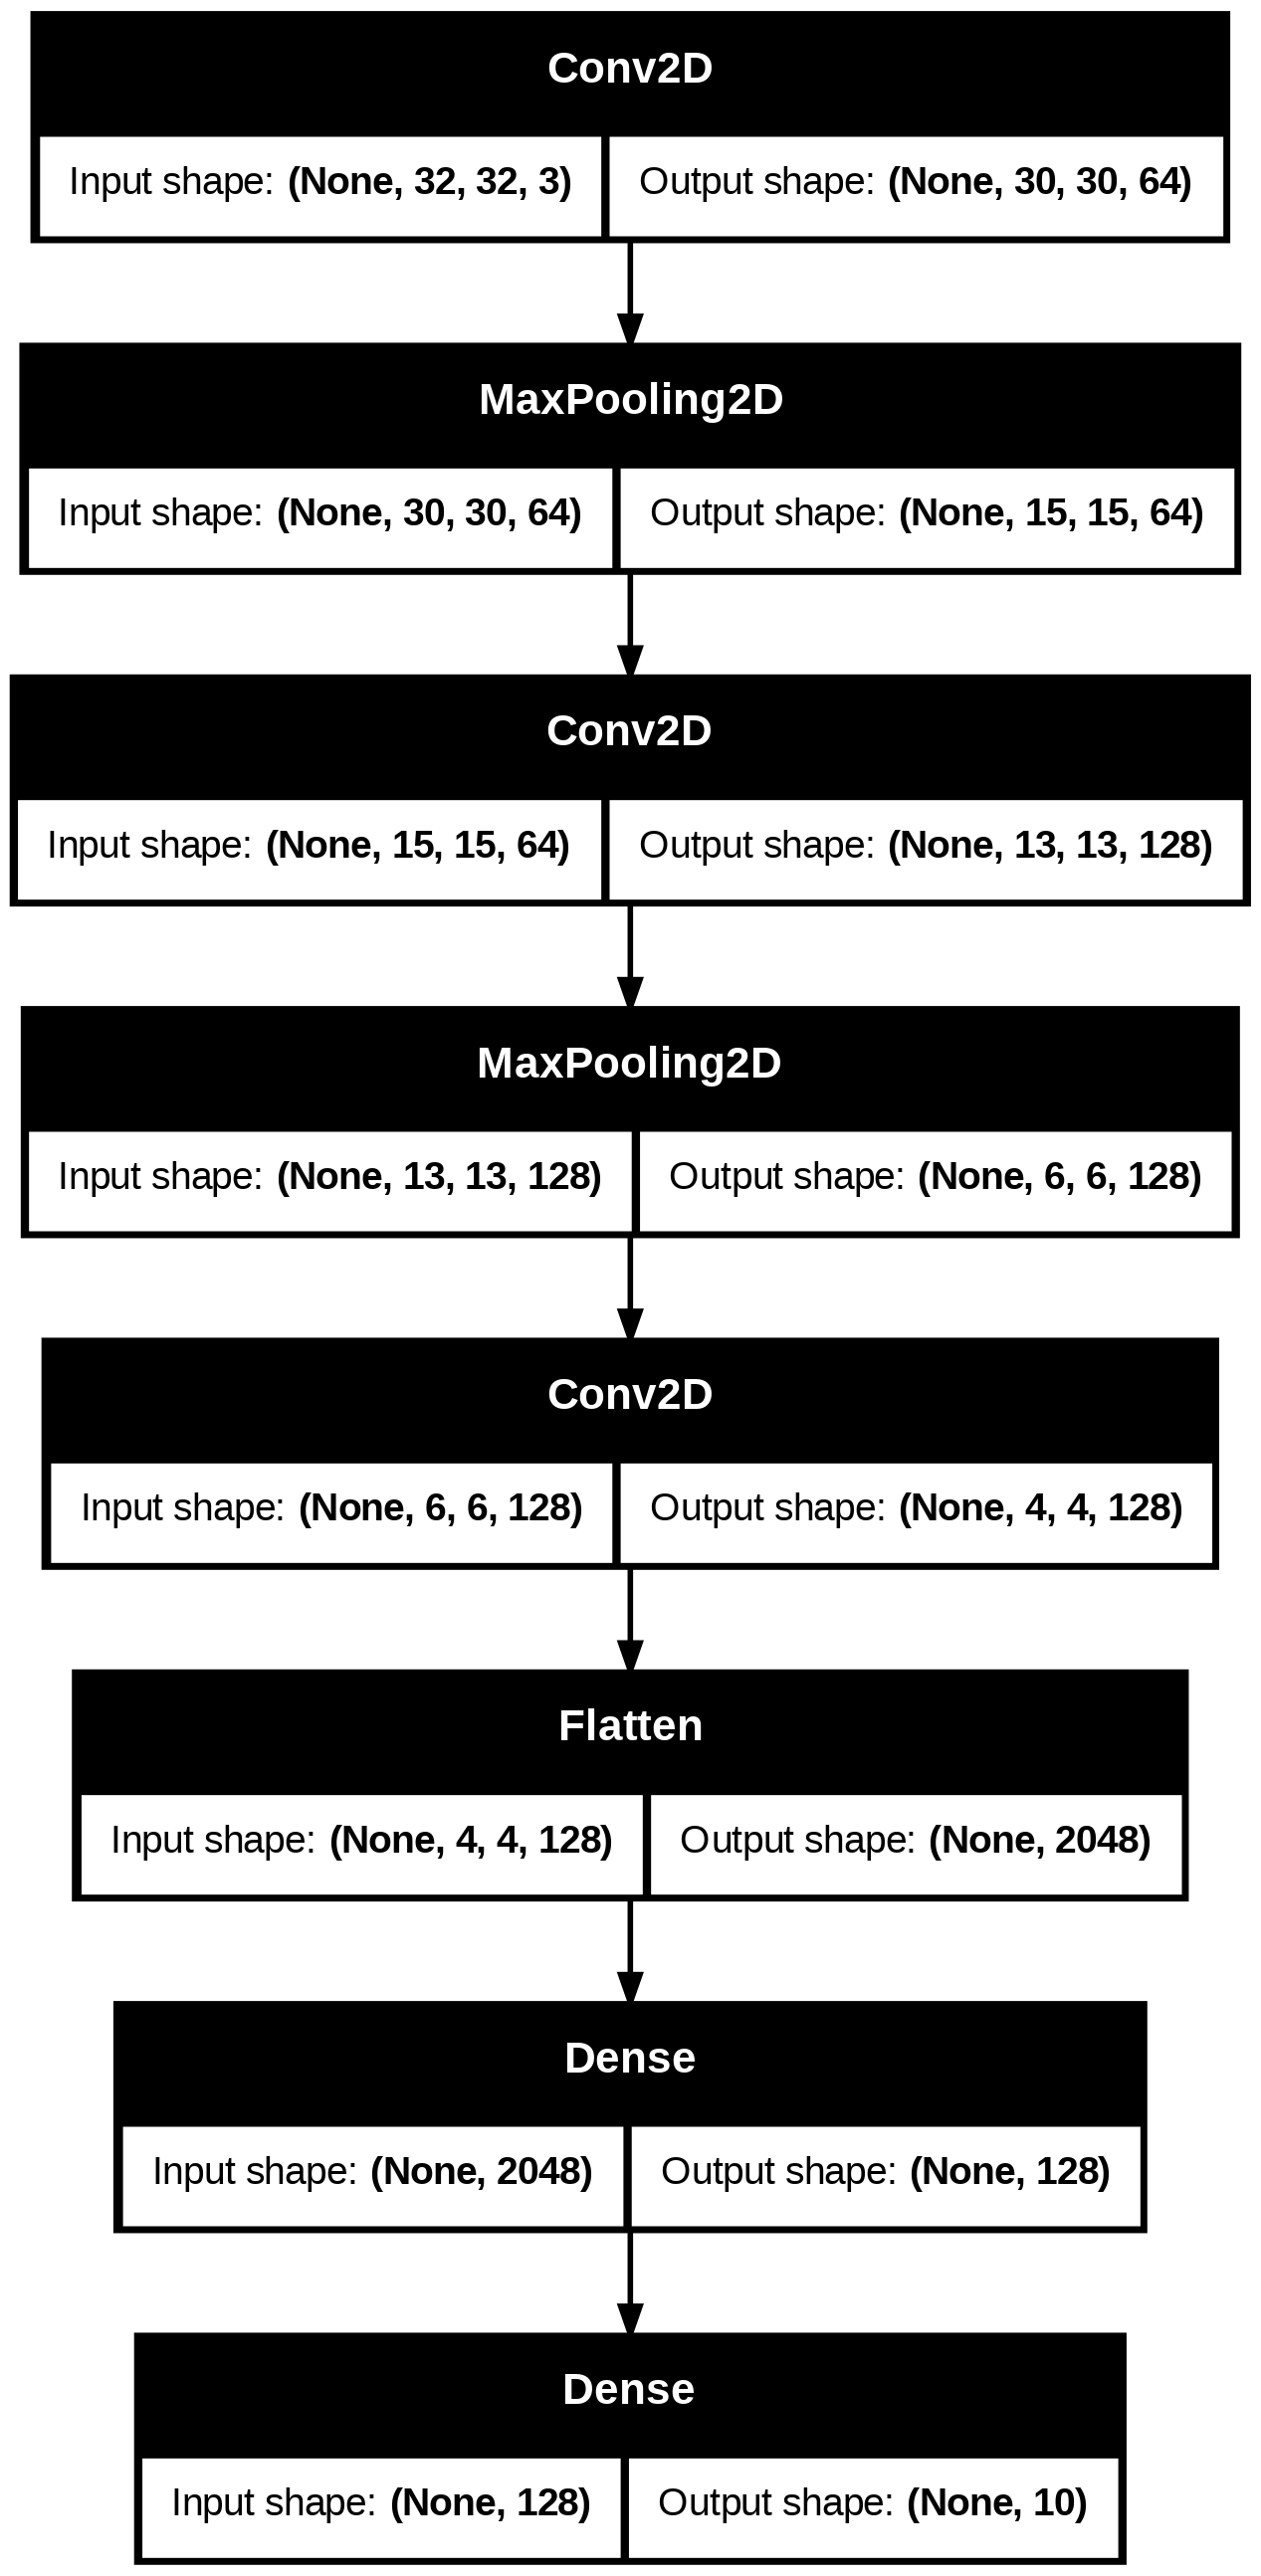

In [5]:
# Import plot_model for visualizing the model architecture
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Save and visualize the model architecture
plot_model(model, to_file="model_architecture.png", show_shapes=True)
Image(filename="model_architecture.png")


In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=30,validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 110ms/step - accuracy: 0.9562 - loss: 0.1286 - val_accuracy: 0.7068 - val_loss: 1.7837
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 108ms/step - accuracy: 0.9604 - loss: 0.1126 - val_accuracy: 0.7044 - val_loss: 1.8598
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 110ms/step - accuracy: 0.9629 - loss: 0.1079 - val_accuracy: 0.6960 - val_loss: 1.8989
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 109ms/step - accuracy: 0.9684 - loss: 0.0934 - val_accuracy: 0.7002 - val_loss: 2.0227
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 109ms/step - accuracy: 0.9650 - loss: 0.1030 - val_accuracy: 0.6977 - val_loss: 2.0631
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 108ms/step - accuracy: 0.9683 - loss: 0.0963 - val_accuracy: 0.7036 - val_loss: 2.0969
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.9675 - loss: 0.0969 - val_accuracy: 0.7046 - val_loss: 2.1524
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 110ms/step - ac

313/313 - 8s - 27ms/step - accuracy: 0.6947 - loss: 3.0592


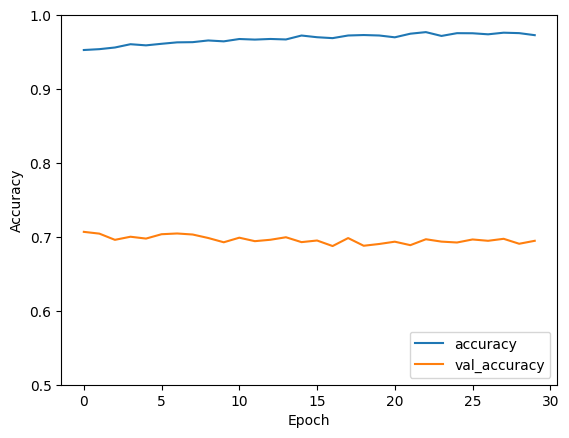

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.6947000026702881


In [11]:
# save model
model.save('mst_final_model.h5')

In [16]:
from tensorflow.keras import preprocessing, models
import numpy as np

# Function to load and preprocess multiple images
def load_images(filenames):
    images = []
    for filename in filenames:
        # Load and preprocess each image
        img = preprocessing.image.load_img(filename, target_size=(32, 32))
        img = preprocessing.image.img_to_array(img)
        img = img.astype('float32') / 255.0  # Normalize pixel values
        images.append(img)
    # Stack all images into a single batch
    return np.stack(images, axis=0)

# Function to predict and print results for multiple images
def run_example(filenames):
    # Load and preprocess images
    imgs = load_images(filenames)
    # Load the model
    model = models.load_model('mst_final_model.h5')
    # Predict the class for each image in the batch
    predictions = model.predict(imgs)

    # Loop through filenames and predictions to print results
    for i, pred in enumerate(predictions):
        result = np.argmax(pred)
        print(f"Prediction for {filenames[i]}:", class_names[result])

# List of image filenames to predict
filenames = ['deer.png','ship.png','airplane.png','webotscat.png']  # Add your image paths here

# Run the prediction for multiple images
run_example(filenames)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction for deer.png: deer
Prediction for ship.png: ship
Prediction for airplane.png: airplane
Prediction for webotscat.png: airplane
